## Task 3
### -Saanvi Garg

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA

In [4]:
df = pd.read_csv("Boston.csv")   

df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [8]:
df.shape

(506, 15)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [14]:
df.describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [20]:
df.isnull().sum()

Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
medv          0
dtype: int64

### No missing values

In [22]:
df.drop_duplicates(inplace=True)
print(df.shape)

(506, 15)


In [120]:
X = df.drop("medv", axis=1)  
y = df["medv"]

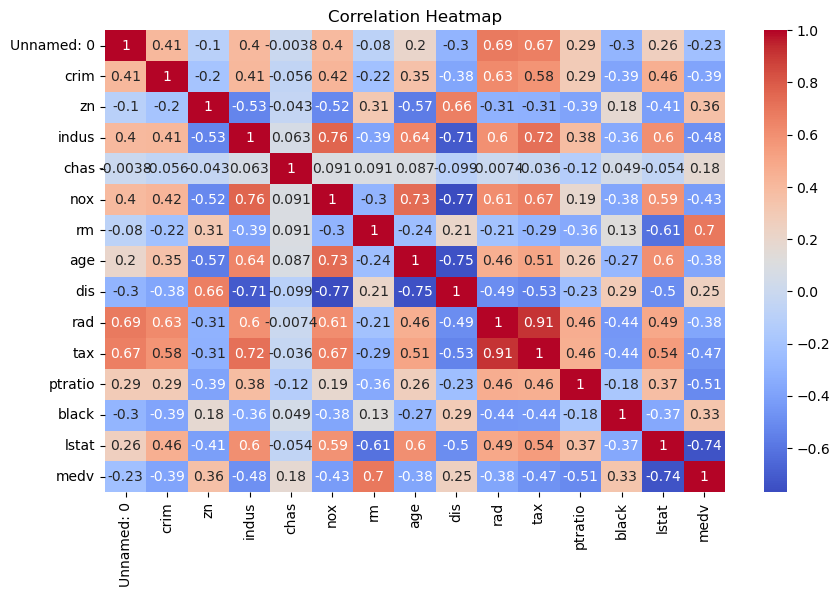

In [53]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 24.49781977763038
R² Score: 0.6659408703343037


In [32]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaler.fit_transform(X))

print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.45765243 0.11593161]


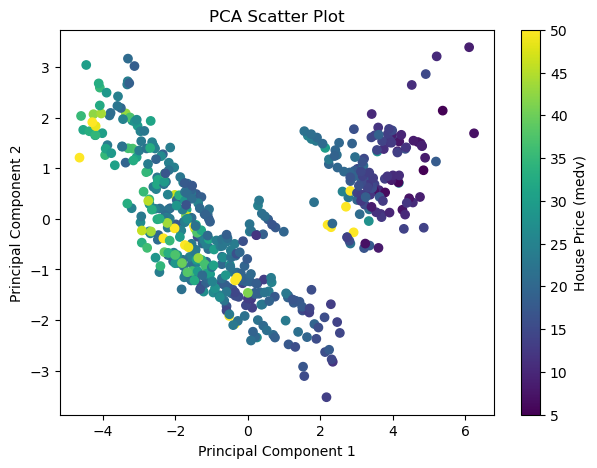

In [34]:
plt.figure(figsize=(7,5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap="viridis")
plt.colorbar(label="House Price (medv)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Scatter Plot")
plt.show()

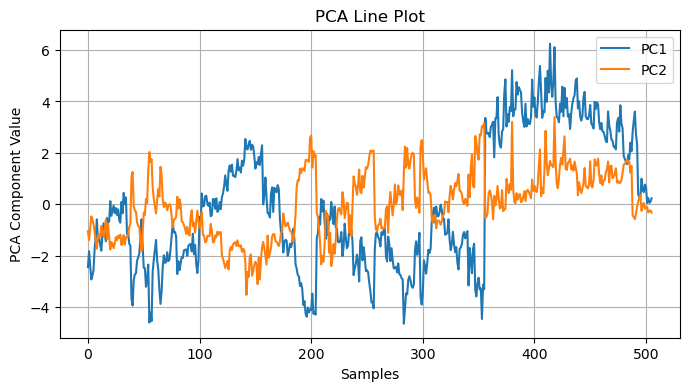

In [40]:
plt.figure(figsize=(8,4))
plt.plot(X_pca[:, 0], label="PC1")
plt.plot(X_pca[:, 1], label="PC2")
plt.xlabel("Samples")
plt.ylabel("PCA Component Value")
plt.title("PCA Line Plot")
plt.legend()
plt.grid(True)
plt.show()

In [75]:
m, n = X_train.shape   # m = samples, n = features

w_init = np.random.randn(n, 1) * 0.01
b_init = np.random.randn() * 0.01
lambd = 0.5 

In [77]:
def compute_cost(X, y, w, b, lambd):
    m = X.shape[0]
    f_wb = np.dot(X, w) + b
    errors = f_wb - y
    cost = np.sum(errors**2) / (2 * m)
    cost += (lambd / (2 * m)) * np.dot(w.T, w).item()
    return cost

In [79]:
def compute_gradient(X, y, w, b, lambd):
    m, n = X.shape
    f_wb = np.dot(X, w) + b
    errors = f_wb - y

    dj_dw = (np.dot(X.T, errors) / m) + (lambd / m) * w
    dj_db = np.sum(errors) / m

    return dj_db, dj_dw

In [89]:
def zscore_normalize_features(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    sigma[sigma == 0] = 1.0
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

X_train, X_mu, X_sigma = zscore_normalize_features(X_train)
X_test = (X_test - X_mu) / X_sigma

In [91]:
X_train, X_mu, X_sigma = zscore_normalize_features(X_train)
X_test = (X_test - X_mu) / X_sigma

X_train = np.array(X_train, dtype=float)
X_test = np.array(X_test, dtype=float)
y_train = np.array(y_train, dtype=float).reshape(-1, 1)
y_test = np.array(y_test, dtype=float).reshape(-1, 1)

m, n = X_train.shape
w_init = np.random.randn(n, 1) * 0.01
b_init = np.random.randn() * 0.01

In [93]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambd):
    J_history = []
    w = w_in.copy()
    b = b_in

    for i in range(num_iters):
        dj_db, dj_dw = gradient_function(X, y, w, b, lambd)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        cost = cost_function(X, y, w, b, lambd)
        J_history.append(cost)

        if i % (num_iters // 10) == 0:
            print(f"Iteration {i}, Cost: {cost:.4f}")

    return w, b, J_history

In [95]:
iterations = 1000
alpha = 0.005

X_train = np.array(X_train, dtype=float)
X_test = np.array(X_test, dtype=float)
y_train = np.array(y_train, dtype=float).reshape(-1, 1)
y_test = np.array(y_test, dtype=float).reshape(-1, 1)

w_final, b_final, J_hist = gradient_descent(
    X_train, y_train,
    w_init, b_init,
    compute_cost, compute_gradient,
    alpha, iterations, lambd
)

Iteration 0, Cost: 299.3851
Iteration 100, Cost: 110.9625
Iteration 200, Cost: 47.8767
Iteration 300, Cost: 24.8788
Iteration 400, Cost: 16.4143
Iteration 500, Cost: 13.2541
Iteration 600, Cost: 12.0422
Iteration 700, Cost: 11.5526
Iteration 800, Cost: 11.3350
Iteration 900, Cost: 11.2232


In [97]:
y_pred_train = np.dot(X_train, w_final) + b_final
y_pred_test = np.dot(X_test, w_final) + b_final

In [99]:
def r_squared(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true))**2)
    ss_residual = np.sum((y_true - y_pred)**2)
    return 1 - (ss_residual / ss_total)

r2_train = r_squared(y_train, y_pred_train)
r2_test = r_squared(y_test, y_pred_test)

print(f"\nR² (Train): {r2_train:.4f}")
print(f"R² (Test):  {r2_test:.4f}")


R² (Train): 0.7437
R² (Test):  0.6402


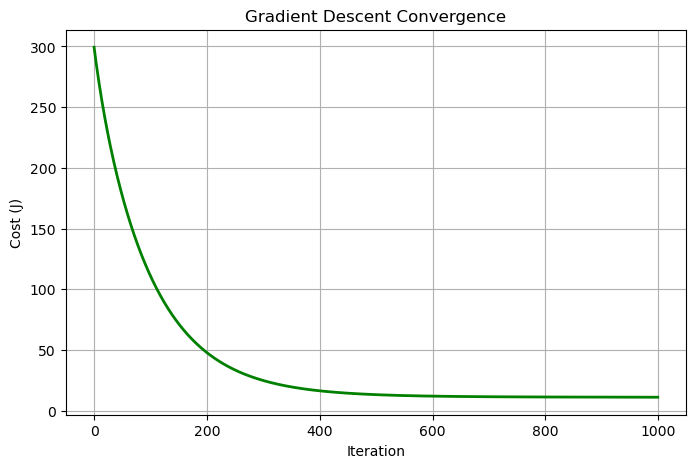

In [117]:
plt.figure(figsize=(8,5))
plt.plot(J_hist, linewidth=2, color='green')
plt.xlabel("Iteration")
plt.ylabel("Cost (J)")
plt.title("Gradient Descent Convergence")
plt.grid(True)
plt.show()

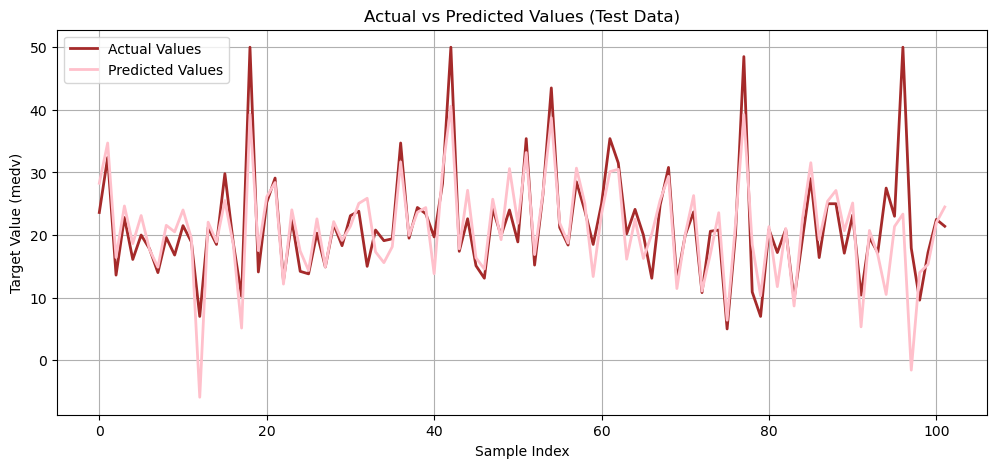

In [111]:
y_test_flat = y_test.flatten()
y_pred_test_flat = y_pred_test.flatten()

plt.figure(figsize=(12,5))
plt.plot(y_test_flat, label="Actual Values", linewidth=2, color='brown')
plt.plot(y_pred_test_flat, label="Predicted Values", linewidth=2, color='pink')
plt.xlabel("Sample Index")
plt.ylabel("Target Value (medv)")
plt.title("Actual vs Predicted Values (Test Data)")
plt.legend()
plt.grid(True)
plt.show()

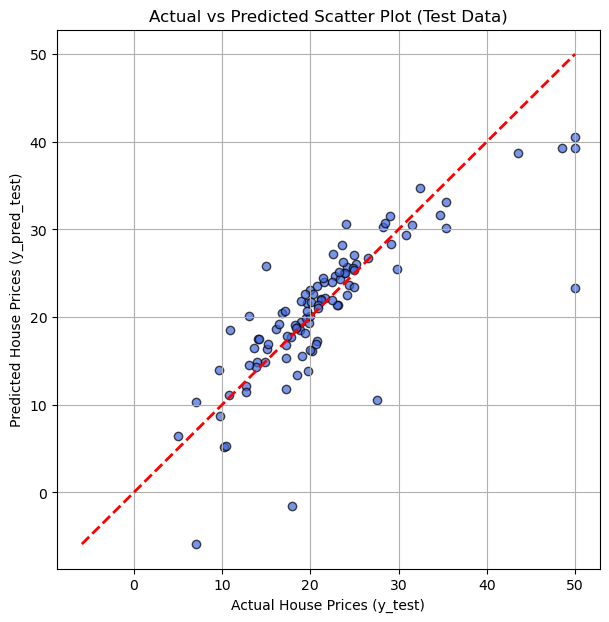

In [115]:
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred_test, color="royalblue", alpha=0.7, edgecolors='k')
plt.xlabel("Actual House Prices (y_test)")
plt.ylabel("Predicted House Prices (y_pred_test)")
plt.title("Actual vs Predicted Scatter Plot (Test Data)")
plt.grid(True)

min_val = min(y_test.min(), y_pred_test.min())
max_val = max(y_test.max(), y_pred_test.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)

plt.show()